# PNSol Data Analysis
dataset1.csv (provided)
 - This is the dataset in which the (synthetic) network conditions are time-stationary.
 
<i> April 22. 2023 </i> <br>
<i> completed by Irina White </i>
<hr>

## Part I
Delay / Loss overview over time.

In [2]:
# obtain required libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warning messages'
import matplotlib.pyplot as plt
import seaborn as sns

#upload dataset
data=pd.read_csv('dataset1.csv')
data.head()

,time,size,AtoB,AtoC,AtoD
0,0.0000,818,0.026636,0.026641,0.058185
1,0.2045,1154,0.027308,0.027315,0.061547
2,0.4930,770,0.026540,0.026550,0.057710
3,0.6855,818,0.026636,0.026644,0.058188
4,0.8900,914,0.026828,0.026835,0.059147


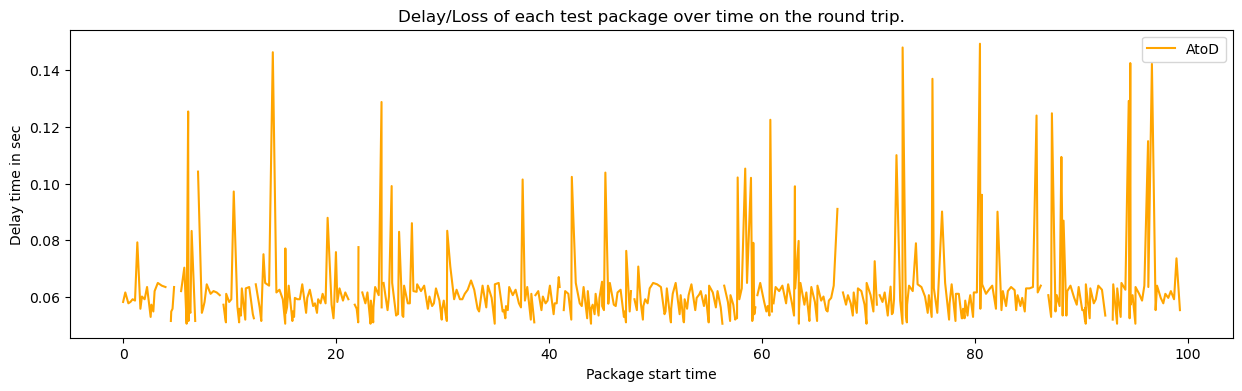

In [12]:
plt.figure(figsize=(15, 4))
#data['AtoD'].plot.kde(bw_method=0.001, color='orange', label='AtoD')
plt.plot(data['time'], data['AtoD'], color='orange', label='AtoD')
#plt.xticks(np.arange(0, 150, 5))
plt.legend()
plt.title('Delay/Loss of each test package over time on the round trip.')
plt.xlabel('Package start time')
plt.ylabel('Delay time in sec')
plt.show()

Initial analysis of the data:
- statistical data for dime delay between observation points
- visual representation of the delays/losses of individual test packets
- dropped packages summary

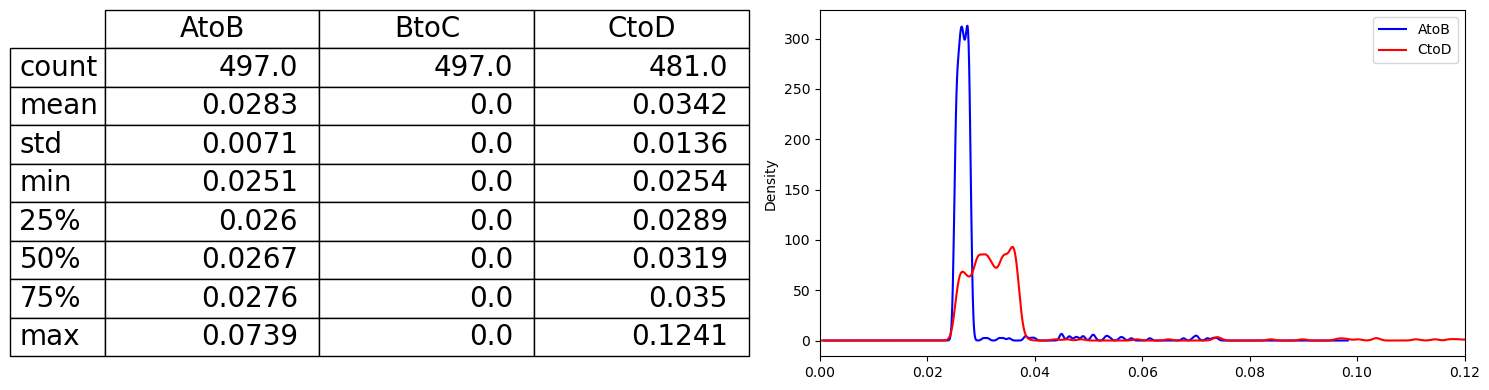

In [3]:
#create value of delays/losses between observation points
# KDE plot to see the distribution of observations between point.
# using bandwith of 0.05 to smooth the noise.
# skip BtoC segment for better visualis

data['BtoC']=data['AtoC']-data['AtoB']
data['CtoD']=data['AtoD']-data['AtoC']
stat=round(data[['AtoB','BtoC','CtoD']].describe(),4)

fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(121)
#font_size = 24
bbox = [0, 0, 1, 1]
ax1.axis('off')
stat_table = ax1.table(cellText=stat.values, rowLabels=stat.index, bbox=bbox, colLabels=stat.columns)
stat_table.set_fontsize(20)

ax2 = fig.add_subplot(122)
data['AtoB'].plot.kde(bw_method=0.05, color='blue', label='AtoB')
data['CtoD'].plot.kde(bw_method=0.05, color='red', label='CtoD')
plt.xlim(0,0.12)
plt.tight_layout()
plt.legend()

plt.show()

In [4]:
# NA values in the dataset
data_na=data[data.isna().any(axis=1)]
data_na

,time,size,AtoB,AtoC,AtoD,BtoC,CtoD
18,4.3170,674,NaN,NaN,NaN,NaN,NaN
23,5.1235,1298,0.027596,0.027598,NaN,0.000002,NaN
34,6.8090,914,0.026828,0.026835,NaN,0.000007,NaN
44,9.3460,338,0.025676,0.025684,NaN,0.000008,NaN
62,12.3430,482,0.025964,0.025974,NaN,0.000010,NaN
106,21.3890,1490,0.027980,0.027985,NaN,0.000005,NaN
111,22.3515,482,0.025964,0.025969,NaN,0.000005,NaN
124,24.4460,98,0.025196,0.025203,NaN,0.000007,NaN
193,38.6525,338,0.025676,0.025681,NaN,0.000005,NaN
206,41.3470,194,0.025388,0.025389,NaN,0.000001,NaN


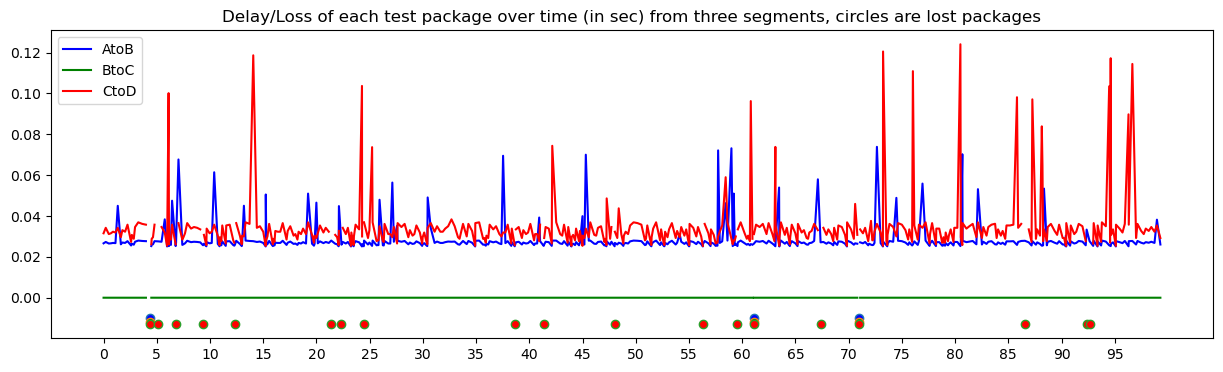

In [5]:
# visual representation of the lost packets
plt.figure(figsize=(15, 4))
data_naAB=data[data['AtoB'].isnull()]
data_naBC=data[data['BtoC'].isnull()]
data_naCD=data[data['CtoD'].isnull()]
data_naAB=data_naAB[['time', 'size', 'AtoB']]
data_naBC=data_naBC[['time', 'size', 'BtoC']]
data_naCD=data_naCD[['time', 'size', 'CtoD']]
data_naAB.fillna(-0.01, inplace=True)
data_naBC.fillna(-0.012, inplace=True)
data_naCD.fillna(-0.013, inplace=True)
plt.plot(data['time'], data['AtoB'], color='blue', label='AtoB')
plt.plot(data['time'], data['BtoC'], color='green', label='BtoC')
plt.plot(data['time'], data['CtoD'], color='red', label='CtoD')
plt.plot(data_naAB['time'], data_naAB['AtoB'], linestyle='None', marker="o", markerfacecolor="blue")
plt.plot(data_naBC['time'], data_naBC['BtoC'], linestyle='None', marker="o", markerfacecolor="green")
plt.plot(data_naCD['time'], data_naCD['CtoD'], linestyle='None', marker="o", markerfacecolor="red")
plt.xticks(np.arange(0, 100, 5))
plt.legend()
plt.title('Delay/Loss of each test packets over time (in sec) from three segments, circles are lost test packets')
plt.show()

### <b>Observational notes:</b>
- Segments AtoB (blue line) and BtoC (green line) have less delay/loss; section BtoC returns the test packets almost immediately. This potentially means: there are no serious issues between Customer Probe Exit observation point, Network Probe Entry observation point and Network Probe Exit observation point. 
- min $\Delta Q$ for AtoB and CtoD:   0.0251 vs. 0.0254
- average $\Delta Q$ for AtoB & CtoD:  0.0283 vs. 0.0342 almost 21% insrease.
- There is a noticeable delays in segment CtoD (red line): between Network Probe exit and Customer Probe entry (downstream).
- The st.dev. shows that data values from CtoD segment are more spread out.
- There is a higher number of dropped packets (19/500 = 3.8 %) vs (3/500 = 0.6%) in first two sections. Where the usual acceptable drop rate is considered 2.5%, therefore 3.8% can affect the performance of the network.
- Loss of three packages on the section AtoB can possibly be related to network load/congestion and scheduling/buffering ( $\Delta Q$<sub>|V</sub>).
- Loss of other 16 packets on the section CtoD can possibly be related to similar variable delay.
<hr>

## Part II
Delay/Loss overview with respect to package size.

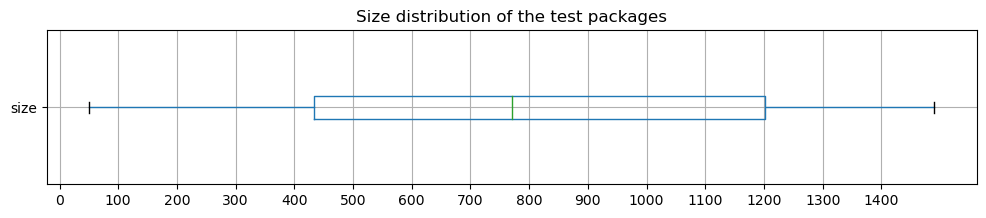

In [6]:
#quick overview of the size distribution of the test packets
plt.figure(figsize=(12, 2))
data.boxplot(column='size', figsize=(4, 3), vert=False)
plt.title('Size distribution of the test packets')
plt.xticks(np.arange(0, 1500, 100))
plt.show()

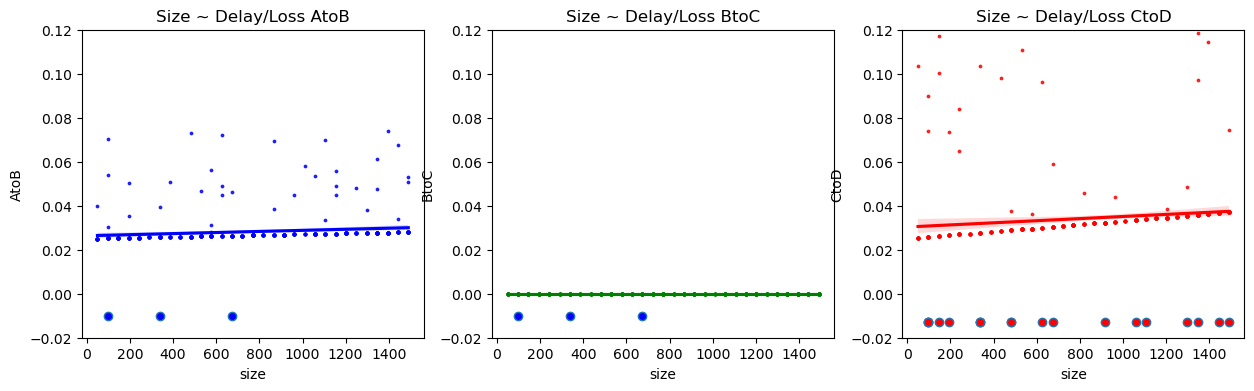

In [8]:
plt.figure(figsize=(15, 4))

plt.subplot(1,3,1)
plt.title('Size ~ Delay/Loss AtoB')
sns.regplot(x='size', y='AtoB', data=data, color='blue', scatter_kws={'s':3})
#plt.plot(data['size'], data['AtoB'], linestyle='None', marker="o", markerfacecolor="blue")
plt.plot(data_naAB['size'], data_naAB['AtoB'], linestyle='None', marker="o", markerfacecolor="blue")
plt.ylim(-0.02, 0.12)

plt.subplot(1,3,2)
plt.title('Size ~ Delay/Loss BtoC')
sns.regplot(x='size', y='BtoC', data=data, color='green', scatter_kws={'s':3})
#plt.plot(data['size'], data['BtoC'], linestyle='None', marker="o", markerfacecolor="green")
plt.plot(data_naAB['size'], data_naAB['AtoB'], linestyle='None', marker="o", markerfacecolor="blue")
plt.ylim(-0.02, 0.12)

plt.subplot(1,3,3)
plt.title('Size ~ Delay/Loss CtoD')
sns.regplot(x='size', y='CtoD', data=data, color='red', scatter_kws={'s':3})
#plt.plot(data['size'], data['CtoD'], linestyle='None', marker="o", markerfacecolor="red")
plt.plot(data_naCD['size'], data_naCD['CtoD'], linestyle='None', marker="o", markerfacecolor="red")
plt.ylim(-0.02, 0.12)


plt.show()

In [9]:
#calculate data for the linear regression line:
data_no_na=data.dropna(axis= 0, how='any')
from scipy import stats
slopeAB, interceptAB, r_value, p_value, std_err = stats.linregress(data_no_na['size'], data_no_na['AtoB'])
slopeCD, interceptCD, r_value, p_value, std_err = stats.linregress(data_no_na['size'], data_no_na['CtoD'])
print(f"Line of best fit for AtoB: slope {slopeAB} and y-intercept {interceptAB} \n \n\
Line of best fit for CtoD: slope {slopeCD} and y-intercept {interceptCD}")

Line of best fit for AtoB: slope 2.4314249352100536e-06 and y-intercept 0.026411364265162156 
 
Line of best fit for AtoB: slope 4.775718314512852e-06 and y-intercept 0.030327729806707306


### <b>Observational notes:</b>
- Sizes of the packets are well distributed.

- The visualisation of the delay/loss with respect to the package size shows expected positive correlation on both segments: AtoB and CtoD (on BtoC the loss is practically non-existent).

- While three outbound dropped packages are highly likely due to the variable delay $\Delta Q$<sub>|V</sub>: congestion.

- Additional 16 packages were dropped with incoming traffic/ downstream. Possible issues: 
    1. ureadable/modified packages
    2. congestion: full queue on the customer's router
    3. dropped connection due to port problem / access node (eqiupment)?
    4. smaller buffers on customer side or OS is too busy handle them in time 
    5. most likely it is $\Delta Q$<sub>|v</sub>, however $\Delta Q$<sub>|s</sub> might be an option.
    6. Average loss rate or delay/length on CtoD: 0.0429ms/bite
<hr>

## Part III
Further statistical analysis: CDF

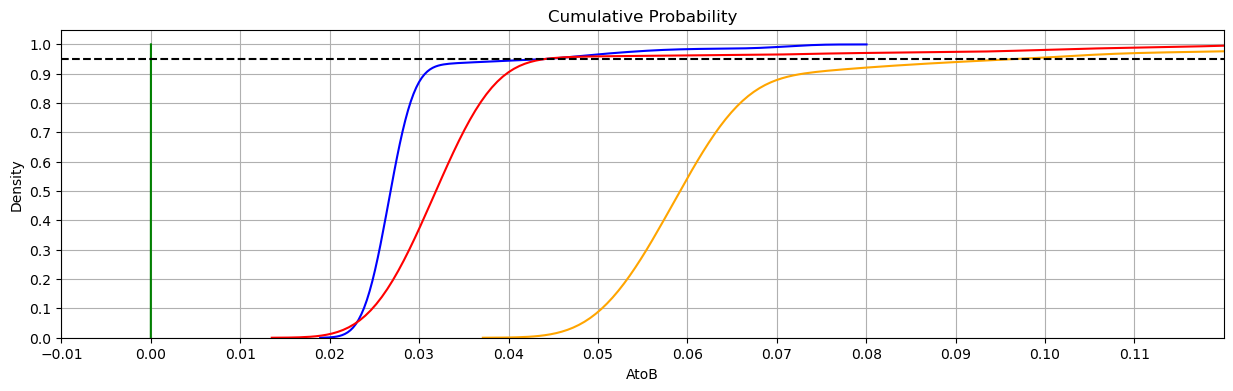

In [16]:
#Likelihood of occurance of each delay/loss.

fig, ax = plt.subplots(figsize=[15,4])
ax.get_title(loc="center")
ax.set_title('Cumulative Probability')

sns.kdeplot(data = data['AtoB'], cumulative = True, label = 'AtoB', color='blue')
sns.kdeplot(data = data['BtoC'], cumulative = True, label = 'BtoC', color='green')
sns.kdeplot(data = data['CtoD'], cumulative = True, label = 'CtoD', color='red')
sns.kdeplot(data = data['AtoD'], cumulative = True, label = 'AtoD', color='orange')
plt.axhline(y=0.95, color='black', ls='--')


ax.set_xlim(0, 0.12)
ax.set_xticks(np.arange(-0.01, 0.12, 0.01))
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.grid()
plt.show()

### <b>Observational notes:</b>
<i> * 40~60ms latency is considered good with under 100ms is average accetable. *  from https://www.centurylink.com/home/help/internet/how-to-improve-gaming-latency.html</i>
- AtoB: 50% of the delays last for less than ~26ms, while 95% of the delays are less than ~45ms for packages up to 1.5kBit.

- CtoD: 50% of the delays last for less than ~34ms, while 95% of the delays are less than ~48ms.

- AtoD: 50% of the delays last for less than ~60ms, while 95% of the delays are less than ~94ms.

### Conclusion: 
While performance on the separate segments seems to show acceptable results, the situation is mostly affected by CtoD segment performance,downstream. The issue is most likely related to the variable delay $\Delta Q$<sub>|V</sub>: buffering, congestion, load.
The worrisome issue here is the loss packet rate: 3.8%, the reason can be overloaded network devices.